In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests                      
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import model_selection

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
#from skopt import BayesSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import absolute
from numpy import sqrt
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Importing Dataset
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df_raw = pd.read_csv(url)

In [4]:
print("Shape of Data Frame is ------>",df_raw.shape)

Shape of Data Frame is ------> (116102, 62)


# ML Algorithms - Building Models for correlating Deaths and Vaccinations Parameters

In [ ]:
df = df_raw

In [ ]:
#Segregating data country-wise
df_India = df[df.location == 'India']
df_India = df_India[['total_cases', 'new_cases', 'new_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 
                     'new_tests', 'new_tests_smoothed', 'total_tests', 'total_deaths',
                     'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations_smoothed']]
df_India2 = df_India.copy()
df_India2=df_India2.replace(np.nan, 0)

df_US = df[df.location == 'United States']
df_US = df_US[['total_cases', 'new_cases', 'new_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 
                     'new_tests', 'new_tests_smoothed', 'total_tests', 'total_deaths',
                     'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations_smoothed']]
df_US2 = df_US.copy()
df_US2=df_US2.replace(np.nan, 0)

df_Mexico = df[df.location == 'Mexico']
df_Mexico = df_Mexico[['total_cases', 'new_cases', 'new_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 
                     'new_tests', 'new_tests_smoothed', 'total_tests', 'total_deaths',
                     'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations_smoothed']]
df_Mexico2 = df_Mexico.copy()
df_Mexico2=df_Mexico2.replace(np.nan, 0)

df_Peru = df[df.location == 'Peru']
df_Peru = df_Peru[['total_cases', 'new_cases', 'new_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 
                     'new_tests', 'new_tests_smoothed', 'total_tests', 'total_deaths',
                     'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations_smoothed']]
df_Peru2 = df_Peru.copy()
df_Peru2=df_Peru2.replace(np.nan, 0)

df_Brazil = df[df.location == 'Brazil']
df_Brazil = df_Brazil[['total_cases', 'new_cases', 'new_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 
                     'new_tests', 'new_tests_smoothed', 'total_tests', 'total_deaths',
                     'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations_smoothed']]
#df_Brazil = df_Brazil.fillna(0)
df_Brazil2 = df_Brazil.copy()
df_Brazil2=df_Brazil2.replace(np.nan, 0)
#df_Brazil2

# [['total_cases', 'new_cases', 'new_deaths', 'total_deaths', 'new_tests', 'new_tests_smoothed', 'total_tests', 
#                      'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations_smoothed', 'population']]

In [ ]:
input_columns_India=[column for column in df_India2.columns if column!='new_deaths']
output_columns_India='new_deaths'
print(input_columns_India,output_columns_India)

input_columns_US=[column for column in df_US2.columns if column!='new_deaths']
output_columns_US='new_deaths'

input_columns_Mexico=[column for column in df_Mexico2.columns if column!='new_deaths']
output_columns_Mexico='new_deaths'

input_columns_Peru=[column for column in df_Peru2.columns if column!='new_deaths']
output_columns_Peru='new_deaths'

input_columns_Brazil=[column for column in df_Brazil2.columns if column!='new_deaths']
output_columns_Brazil='new_deaths'

['total_cases', 'new_cases', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_tests', 'new_tests_smoothed', 'total_tests', 'total_deaths', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations_smoothed'] new_deaths


In [ ]:
X_India=df_India2.loc[:,input_columns_India].values
Y_India=df_India2.loc[:,output_columns_India].values
print(X_India.shape,Y_India.shape)

X_US=df_US2.loc[:,input_columns_US].values
Y_US=df_US2.loc[:,output_columns_US].values
print(X_US.shape,Y_US.shape)

X_Mexico=df_Mexico2.loc[:,input_columns_Mexico].values
Y_Mexico=df_Mexico2.loc[:,output_columns_Mexico].values
print(X_Mexico.shape,Y_Mexico.shape)

X_Peru=df_Peru2.loc[:,input_columns_Peru].values
Y_Peru=df_Peru2.loc[:,output_columns_Peru].values
print(X_Peru.shape,Y_Peru.shape)

X_Brazil=df_Brazil2.loc[:,input_columns_Brazil].values
Y_Brazil=df_Brazil2.loc[:,output_columns_Brazil].values
print(X_Brazil.shape,Y_Brazil.shape)

(591, 11) (591,)
(599, 11) (599,)
(620, 11) (620,)
(620, 11) (620,)
(564, 11) (564,)


### Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train_India,x_test_India,y_train_India,y_test_India=train_test_split(X_India,Y_India,test_size=0.2,random_state=20)
x_train_US,x_test_US,y_train_US,y_test_US=train_test_split(X_US,Y_US,test_size=0.2,random_state=20)
x_train_Mexico,x_test_Mexico,y_train_Mexico,y_test_Mexico=train_test_split(X_Mexico,Y_Mexico,test_size=0.2,random_state=20)
x_train_Peru,x_test_Peru,y_train_Peru,y_test_Peru=train_test_split(X_Peru,Y_Peru,test_size=0.2,random_state=20)
x_train_Brazil,x_test_Brazil,y_train_Brazil,y_test_Brazil=train_test_split(X_Brazil,Y_Brazil,test_size=0.2,random_state=20)

In [ ]:
model_params = {
    'Linear Regression': {
        'model': linear_model.LinearRegression(),
        'params' : {
            'fit_intercept':[True,False],
            'normalize':[True,False], 
            'copy_X':[True, False]
        }
    },
    'Random Forest Regression': {
        'model': RandomForestRegressor(),
        'params' : {
            'random_state': [50],
            'max_depth': [10],
            'n_estimators':[500],
            'min_samples_split':[2]
        }  
    },  
    'XGB Regressor': {
        'model': XGBRegressor(verbosity = 0),
        'params' : {
            'n_estimators': [500],
            'random_state':[50],
            'nthread':[4], #when use hyperthread, xgboost may become slower
            'objective':['reg:linear'],
            'learning_rate': [.03, 0.05, .07], #so called `eta` value
            'max_depth': [5, 6, 7],
            'min_child_weight': [4],
            'silent': [1],
            'subsample': [0.7],
            'colsample_bytree': [0.7]
        }  
    }, 
    'Ridge Regressor': {
        'model': Ridge(),
        'params' : {
            'alpha': [0.01],
            'fit_intercept':[True,False],
            'normalize':[True,False],
            'max_iter':[1000]
        }  
    }, 
    'Lasso Regressor': {
        'model': Lasso(),
        'params' : {
            'alpha': [0.01],
            'fit_intercept':[True,False],
            'normalize':[True,False],
            'max_iter':[1000],
            'random_state':[50]
        }  
    }, 
    'ElasticNet Regressor': {
        'model': ElasticNet(),
        'params' : {
            'alpha': [0.01],
            'fit_intercept':[True,False],
            'normalize':[True,False],
            'max_iter':[1000],
            'random_state':[50]
        }  
    }
}

### India

In [ ]:
#Training the model
print("India:")
scores_India = []
for model_name, mp in model_params.items():
    models_India =  mp['model']
    models_India2 = models_India.fit(x_test_India,y_test_India)
    y_pred_India = models_India2.predict(x_test_India)


    scores_India.append({
        'model': model_name,
        'Score':models_India2.score(x_train_India, y_train_India),
        'RSME':math.sqrt(mean_squared_error((models_India.predict(x_test_India)), y_test_India)),
        'Explained Variance': explained_variance_score(y_test_India, y_pred_India),
        'R Squared': r2_score(y_test_India, y_pred_India)
    })
    
regression_models_India = pd.DataFrame(scores_India,columns=['model',
                                                             'Score',
                                                             'Explained Variance', 
                                                             'RSME', 
                                                             'R Squared'
                                                             ])
regression_models_India

India:


,model,Score,Explained Variance,RSME,R Squared
0,Linear Regression,0.425689,0.930869,305.256191,0.930869
1,Random Forest Regression,0.809605,0.969819,201.843949,0.969774
2,XGB Regressor,0.740063,0.998925,38.061976,0.998925
3,Ridge Regressor,0.425689,0.930869,305.256191,0.930869
4,Lasso Regressor,0.483103,0.930468,306.140349,0.930468
5,ElasticNet Regressor,0.483103,0.930468,306.140338,0.930468


In [ ]:
#Evaluating the ML models using cross validation
print("India:")
scores_India = []
for model_name, mp in model_params.items():
    # KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    
    # Repeated K-Fold
    rfolds = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=2)

    # GridSearchCV
    #clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,random_state=10,n_jobs=4,refit=True)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=folds, return_train_score=False,n_jobs=4,refit=True)
    clf.fit(x_train_India, y_train_India)

    #lm_scores = cross_val_score(lm_India, x_train_India, y_train_India, scoring='r2', cv=5)
    
    #R2 score by Cross Val Score - kFold
    kfold = cross_val_score(mp['model'], x_train_India, y_train_India, scoring='r2', cv=folds,n_jobs=-1)
  	
    #R2 score by Cross Val Score - Repeated kFold
    repeatedkfold = cross_val_score(mp['model'], x_train_India, y_train_India, scoring='r2', cv=rfolds,n_jobs=-1)

    #R2 score by Cross Val Score - Stratified kFold
    stratifiedkfold = cross_val_score(mp['model'], x_train_India, y_train_India, scoring='r2', cv=skf,n_jobs=-1)
    #stratifiedkfold = cross_val_score(mp['model'], x_train_India, y_train_India, scoring='neg_mean_absolute_error', cv=skf,n_jobs=-1)

    # LeaveOneOutCV
    cv = LeaveOneOut()
    #use LOOCV to evaluate model
    scores = cross_val_score(mp['model'], x_train_India, y_train_India, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
    #mean(absolute(scores))

    scores_India.append({
        'model': model_name,
        'Cross Validation R2 Score - KFold':mean(kfold),
        'Cross Validation R2 Score - RepeatedKFold':mean(absolute(repeatedkfold)),
        'Cross Validation R2 Score - StratifiedKFold':mean(absolute(stratifiedkfold)),
        'LeaveOneOut Cross Validation Score': mean(absolute(scores)),
        'Best_score_GridSearch': clf.best_score_,
        'Best_params_GridSearch': clf.best_params_
    })
    
regression_models_India = pd.DataFrame(scores_India,columns=['model',
                                                             'Cross Validation R2 Score - KFold',
                                                             'Cross Validation R2 Score - RepeatedKFold',
                                                             'Cross Validation R2 Score - StratifiedKFold',
                                                             'LeaveOneOut Cross Validation Score',
                                                             'Best_score_GridSearch',
                                                             'Best_params_GridSearch'
                                                             ])
regression_models_India

India:


,model,Cross Validation R2 Score - KFold,Cross Validation R2 Score - RepeatedKFold,Cross Validation R2 Score - StratifiedKFold,LeaveOneOut Cross Validation Score,Best_score_GridSearch,Best_params_GridSearch
0,Linear Regression,0.943912,0.953246,0.955943,83.653342,0.944081,"{'copy_X': True, 'fit_intercept': False, 'norm..."
1,Random Forest Regression,0.933977,0.944754,0.921905,85.188242,0.932693,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
2,XGB Regressor,0.942554,0.952471,0.909965,85.729861,0.943018,"{'colsample_bytree': 0.7, 'learning_rate': 0.0..."
3,Ridge Regressor,0.943912,0.953246,0.955943,83.653343,0.945811,"{'alpha': 0.01, 'fit_intercept': True, 'max_it..."
4,Lasso Regressor,0.944076,0.953298,0.955952,83.506132,0.944647,"{'alpha': 0.01, 'fit_intercept': True, 'max_it..."
5,ElasticNet Regressor,0.944076,0.953298,0.955952,83.506114,0.944344,"{'alpha': 0.01, 'fit_intercept': False, 'max_i..."


## United states

In [ ]:
#training the ML models
print("United States:")
scores_US = []
for model_name, mp in model_params.items():
    models_US =  mp['model']
    models_US2 = models_US.fit(x_test_US,y_test_US)
    y_pred_US = models_US2.predict(x_test_US)

    scores_US.append({
        'model': model_name,
        'Score':models_US2.score(x_train_US, y_train_US),
        'RSME':math.sqrt(mean_squared_error((models_US.predict(x_test_US)), y_test_US)),
        'Explained Variance': explained_variance_score(y_test_US, y_pred_US),
        'R Squared': r2_score(y_test_US, y_pred_US)
    })
    
regression_models_US = pd.DataFrame(scores_US,columns=['model',
                                                             'Score',
                                                             'RSME', 
                                                             'Explained Variance', 
                                                             'R Squared'
                                                             ])
regression_models_US

United States:


,model,Score,RSME,Explained Variance,R Squared
0,Linear Regression,0.873744,221.200700,0.956982,0.956982
1,Random Forest Regression,0.830547,112.800998,0.988841,0.988813
2,XGB Regressor,0.797503,58.729418,0.996968,0.996968
3,Ridge Regressor,0.873744,221.200700,0.956982,0.956982
4,Lasso Regressor,0.873624,221.223739,0.956973,0.956973
5,ElasticNet Regressor,0.873624,221.223740,0.956973,0.956973


In [ ]:
#Evaluating the ML models using cross Validation
print("United States:")
scores_US = []
for model_name, mp in model_params.items():
    models_US =  mp['model']
    
    # KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    
    # Repeated K-Fold
    rfolds = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=2)

    # GridSearchCV
    #clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,random_state=10,n_jobs=4,refit=True)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=folds, return_train_score=False,n_jobs=4,refit=True)
    clf.fit(x_train_US, y_train_US)

    #lm_scores = cross_val_score(lm_US, x_train_US, y_train_US, scoring='r2', cv=5)
    
    #R2 score by Cross Val Score - kFold
    kfold = cross_val_score(mp['model'], x_train_US, y_train_US, scoring='r2', cv=folds,n_jobs=-1)
  	
    #R2 score by Cross Val Score - Repeated kFold
    repeatedkfold = cross_val_score(mp['model'], x_train_US, y_train_US, scoring='r2', cv=rfolds,n_jobs=-1)

    #R2 score by Cross Val Score - Stratified kFold
    stratifiedkfold = cross_val_score(mp['model'], x_train_US, y_train_US, scoring='r2', cv=skf,n_jobs=-1)
    #stratifiedkfold = cross_val_score(mp['model'], x_train_US, y_train_US, scoring='neg_mean_absolute_error', cv=skf,n_jobs=-1)

    # LeaveOneOutCV
    cv = LeaveOneOut()
    #use LOOCV to evaluate model
    scores = cross_val_score(mp['model'], x_train_US, y_train_US, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
    #mean(absolute(scores))

    scores_US.append({
        'model': model_name,
        'Cross Validation R2 Score - KFold':mean(kfold),
        'Cross Validation R2 Score - RepeatedKFold': mean(absolute(repeatedkfold)),
        'Cross Validation R2 Score - StratifiedKFold': mean(absolute(stratifiedkfold)),
        'LeaveOneOut Cross Validation Score': mean(absolute(scores)),
        'Best_score_GridSearch': clf.best_score_,
        'Best_params_GridSearch': clf.best_params_
    })
    
regression_models_US = pd.DataFrame(scores_US,columns=['model',
                                                             'Cross Validation R2 Score - KFold',
                                                             'Cross Validation R2 Score - RepeatedKFold',
                                                             'Cross Validation R2 Score - StratifiedKFold',
                                                             'LeaveOneOut Cross Validation Score',
                                                             'Best_score_GridSearch',
                                                             'Best_params_GridSearch'
                                                             ])
regression_models_US

United States:


,model,Cross Validation R2 Score - KFold,Cross Validation R2 Score - RepeatedKFold,Cross Validation R2 Score - StratifiedKFold,LeaveOneOut Cross Validation Score,Best_score_GridSearch,Best_params_GridSearch
0,Linear Regression,0.882249,0.896434,0.890524,196.997556,0.883222,"{'copy_X': True, 'fit_intercept': False, 'norm..."
1,Random Forest Regression,0.868393,0.884042,0.849561,181.893445,0.868426,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
2,XGB Regressor,0.880440,0.894606,0.846232,184.075945,0.899974,"{'colsample_bytree': 0.7, 'learning_rate': 0.0..."
3,Ridge Regressor,0.882249,0.896434,0.890524,196.997557,0.889517,"{'alpha': 0.01, 'fit_intercept': True, 'max_it..."
4,Lasso Regressor,0.882195,0.897159,0.890756,196.429524,0.882226,"{'alpha': 0.01, 'fit_intercept': False, 'max_i..."
5,ElasticNet Regressor,0.882195,0.897159,0.890756,196.429528,0.882226,"{'alpha': 0.01, 'fit_intercept': False, 'max_i..."


## Mexico

In [ ]:
#training the ML models
print("Mexico:")
scores_Mexico = []
for model_name, mp in model_params.items():
    models_Mexico =  mp['model']
    models_Mexico2 = models_Mexico.fit(x_test_Mexico,y_test_Mexico)
    y_pred_Mexico = models_Mexico2.predict(x_test_Mexico)

    scores_Mexico.append({
        'model': model_name,
        'Score':models_Mexico2.score(x_train_Mexico, y_train_Mexico),
        'RSME':math.sqrt(mean_squared_error((models_Mexico.predict(x_test_Mexico)), y_test_Mexico)),
        'Explained Variance': explained_variance_score(y_test_Mexico, y_pred_Mexico),
        'R Squared': r2_score(y_test_Mexico, y_pred_Mexico)
    })
    
regression_models_Mexico = pd.DataFrame(scores_Mexico,columns=['model',
                                                             'Score',
                                                             'RSME', 
                                                             'Explained Variance', 
                                                             'R Squared'
                                                             ])
regression_models_Mexico

Mexico:


,model,Score,RSME,Explained Variance,R Squared
0,Linear Regression,0.504594,294.512839,0.688393,0.688393
1,Random Forest Regression,0.520454,154.382149,0.914492,0.914376
2,XGB Regressor,0.639921,34.222348,0.995793,0.995793
3,Ridge Regressor,0.504595,294.512839,0.688393,0.688393
4,Lasso Regressor,0.494398,294.515886,0.688386,0.688386
5,ElasticNet Regressor,0.494399,294.515887,0.688386,0.688386


In [ ]:
#Evaluating the ML models Mexicoing cross Validation
print("Mexico:")
scores_Mexico = []
for model_name, mp in model_params.items():
    models_Mexico =  mp['model']
    
    # KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    
    # Repeated K-Fold
    rfolds = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=2)

    # GridSearchCV
    #clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,random_state=10,n_jobs=4,refit=True)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=folds, return_train_score=False,n_jobs=4,refit=True)
    clf.fit(x_train_Mexico, y_train_Mexico)

    #lm_scores = cross_val_score(lm_Mexico, x_train_Mexico, y_train_Mexico, scoring='r2', cv=5)
    
    #R2 score by Cross Val Score - kFold
    kfold = cross_val_score(mp['model'], x_train_Mexico, y_train_Mexico, scoring='r2', cv=folds,n_jobs=-1)
  	
    #R2 score by Cross Val Score - Repeated kFold
    repeatedkfold = cross_val_score(mp['model'], x_train_Mexico, y_train_Mexico, scoring='r2', cv=rfolds,n_jobs=-1)

    #R2 score by Cross Val Score - Stratified kFold
    stratifiedkfold = cross_val_score(mp['model'], x_train_Mexico, y_train_Mexico, scoring='r2', cv=skf,n_jobs=-1)
    #stratifiedkfold = cross_val_score(mp['model'], x_train_Mexico, y_train_Mexico, scoring='neg_mean_absolute_error', cv=skf,n_jobs=-1)

    # LeaveOneOutCV
    cv = LeaveOneOut()
    #Mexicoe LOOCV to evaluate model
    scores = cross_val_score(mp['model'], x_train_Mexico, y_train_Mexico, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
    #mean(absolute(scores))

    scores_Mexico.append({
        'model': model_name,
        'Cross Validation R2 Score - KFold':mean(kfold),
        'Cross Validation R2 Score - RepeatedKFold': mean(absolute(repeatedkfold)),
        'Cross Validation R2 Score - StratifiedKFold': mean(absolute(stratifiedkfold)),
        'LeaveOneOut Cross Validation Score': mean(absolute(scores)),
        'Best_score_GridSearch': clf.best_score_,
        'Best_params_GridSearch': clf.best_params_
    })
    
regression_models_Mexico = pd.DataFrame(scores_Mexico,columns=['model',
                                                             'Cross Validation R2 Score - KFold',
                                                             'Cross Validation R2 Score - RepeatedKFold',
                                                             'Cross Validation R2 Score - StratifiedKFold',
                                                             'LeaveOneOut Cross Validation Score',
                                                             'Best_score_GridSearch',
                                                             'Best_params_GridSearch'
                                                             ])
regression_models_Mexico

Mexico:


,model,Cross Validation R2 Score - KFold,Cross Validation R2 Score - RepeatedKFold,Cross Validation R2 Score - StratifiedKFold,LeaveOneOut Cross Validation Score,Best_score_GridSearch,Best_params_GridSearch
0,Linear Regression,0.808469,0.793739,0.810771,112.740345,0.808469,"{'copy_X': True, 'fit_intercept': True, 'norma..."
1,Random Forest Regression,0.830720,0.850799,0.775678,81.154758,0.835941,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
2,XGB Regressor,0.885356,0.877729,0.884008,85.620327,0.857684,"{'colsample_bytree': 0.7, 'learning_rate': 0.0..."
3,Ridge Regressor,0.808469,0.793739,0.810771,112.740347,0.815559,"{'alpha': 0.01, 'fit_intercept': True, 'max_it..."
4,Lasso Regressor,0.808526,0.793755,0.811002,112.734394,0.811391,"{'alpha': 0.01, 'fit_intercept': True, 'max_it..."
5,ElasticNet Regressor,0.808526,0.793755,0.811002,112.734301,0.808697,"{'alpha': 0.01, 'fit_intercept': False, 'max_i..."


## Brazil

In [ ]:
#Training the model
print("Brazil:")
scores_Brazil = []
for model_name, mp in model_params.items():
    models_Brazil =  mp['model']
    models_Brazil2 = models_Brazil.fit(x_test_Brazil,y_test_Brazil)
    y_pred_Brazil = models_Brazil2.predict(x_test_Brazil)


    scores_Brazil.append({
        'model': model_name,
        'Score':models_Brazil2.score(x_train_Brazil, y_train_Brazil),
        'RSME':math.sqrt(mean_squared_error((models_Brazil.predict(x_test_Brazil)), y_test_Brazil)),
        'Explained Variance': explained_variance_score(y_test_Brazil, y_pred_Brazil),
        'R Squared': r2_score(y_test_Brazil, y_pred_Brazil)
    })
    
regression_models_Brazil = pd.DataFrame(scores_Brazil,columns=['model',
                                                             'Score',
                                                             'Explained Variance', 
                                                             'RSME', 
                                                             'R Squared'
                                                             ])
regression_models_Brazil

Brazil:


,model,Score,Explained Variance,RSME,R Squared
0,Linear Regression,0.910631,0.934887,199.578983,0.934887
1,Random Forest Regression,0.894805,0.985655,93.790980,0.985620
2,XGB Regressor,0.888746,0.996490,46.339013,0.996490
3,Ridge Regressor,0.910631,0.934887,199.578983,0.934887
4,Lasso Regressor,0.910653,0.934887,199.579100,0.934887
5,ElasticNet Regressor,0.910653,0.934887,199.579100,0.934887


In [ ]:
#Evaluating the ML models Braziling cross Validation
print("Brazil:")
scores_Brazil = []
for model_name, mp in model_params.items():
    models_Brazil =  mp['model']
    
    # KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    
    # Repeated K-Fold
    rfolds = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=2)

    # GridSearchCV
    #clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,random_state=10,n_jobs=4,refit=True)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=folds, return_train_score=False,n_jobs=4,refit=True)
    clf.fit(x_train_Brazil, y_train_Brazil)

    #lm_scores = cross_val_score(lm_Brazil, x_train_Brazil, y_train_Brazil, scoring='r2', cv=5)
    
    #R2 score by Cross Val Score - kFold
    kfold = cross_val_score(mp['model'], x_train_Brazil, y_train_Brazil, scoring='r2', cv=folds,n_jobs=-1)
  	
    #R2 score by Cross Val Score - Repeated kFold
    repeatedkfold = cross_val_score(mp['model'], x_train_Brazil, y_train_Brazil, scoring='r2', cv=rfolds,n_jobs=-1)

    #R2 score by Cross Val Score - Stratified kFold
    stratifiedkfold = cross_val_score(mp['model'], x_train_Brazil, y_train_Brazil, scoring='r2', cv=skf,n_jobs=-1)
    #stratifiedkfold = cross_val_score(mp['model'], x_train_Brazil, y_train_Brazil, scoring='neg_mean_absolute_error', cv=skf,n_jobs=-1)

    # LeaveOneOutCV
    cv = LeaveOneOut()
    #Brazile LOOCV to evaluate model
    scores = cross_val_score(mp['model'], x_train_Brazil, y_train_Brazil, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
    #mean(absolute(scores))

    scores_Brazil.append({
        'model': model_name,
        'Cross Validation R2 Score - KFold':mean(kfold),
        'Cross Validation R2 Score - RepeatedKFold': mean(absolute(repeatedkfold)),
        'Cross Validation R2 Score - StratifiedKFold': mean(absolute(stratifiedkfold)),
        'LeaveOneOut Cross Validation Score': mean(absolute(scores)),
        'Best_score_GridSearch': clf.best_score_,
        'Best_params_GridSearch': clf.best_params_
    })
    
regression_models_Brazil = pd.DataFrame(scores_Brazil,columns=['model',
                                                             'Cross Validation R2 Score - KFold',
                                                             'Cross Validation R2 Score - RepeatedKFold',
                                                             'Cross Validation R2 Score - StratifiedKFold',
                                                             'LeaveOneOut Cross Validation Score',
                                                             'Best_score_GridSearch',
                                                             'Best_params_GridSearch'
                                                             ])
regression_models_Brazil

Brazil:


,model,Cross Validation R2 Score - KFold,Cross Validation R2 Score - RepeatedKFold,Cross Validation R2 Score - StratifiedKFold,LeaveOneOut Cross Validation Score,Best_score_GridSearch,Best_params_GridSearch
0,Linear Regression,0.918434,0.912632,0.919878,158.433800,0.918437,"{'copy_X': True, 'fit_intercept': False, 'norm..."
1,Random Forest Regression,0.947945,0.940399,0.936851,131.389889,0.947740,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
2,XGB Regressor,0.945298,0.936933,0.934639,137.717624,0.946965,"{'colsample_bytree': 0.7, 'learning_rate': 0.0..."
3,Ridge Regressor,0.918434,0.912632,0.919878,158.433800,0.918437,"{'alpha': 0.01, 'fit_intercept': False, 'max_i..."
4,Lasso Regressor,0.918437,0.912637,0.919879,158.427683,0.918742,"{'alpha': 0.01, 'fit_intercept': True, 'max_it..."
5,ElasticNet Regressor,0.918437,0.912637,0.919879,158.427695,0.918451,"{'alpha': 0.01, 'fit_intercept': False, 'max_i..."


## Peru

In [ ]:
#Training the model
print("Peru:")
scores_Peru = []
for model_name, mp in model_params.items():
    models_Peru =  mp['model']
    models_Peru2 = models_Peru.fit(x_test_Peru,y_test_Peru)
    y_pred_Peru = models_Peru2.predict(x_test_Peru)


    scores_Peru.append({
        'model': model_name,
        'Score':models_Peru2.score(x_train_Peru, y_train_Peru),
        'RSME':math.sqrt(mean_squared_error((models_Peru.predict(x_test_Peru)), y_test_Peru)),
        'Explained Variance': explained_variance_score(y_test_Peru, y_pred_Peru),
        'R Squared': r2_score(y_test_Peru, y_pred_Peru)
    })
    
regression_models_Peru = pd.DataFrame(scores_Peru,columns=['model',
                                                             'Score',
                                                             'Explained Variance', 
                                                             'RSME', 
                                                             'R Squared'
                                                             ])
regression_models_Peru

Peru:


,model,Score,Explained Variance,RSME,R Squared
0,Linear Regression,0.803315,0.917354,88.423245,0.917354
1,Random Forest Regression,0.752545,0.978949,44.644572,0.978932
2,XGB Regressor,0.738437,0.997433,15.584434,0.997433
3,Ridge Regressor,0.803315,0.917354,88.423245,0.917354
4,Lasso Regressor,0.805315,0.917323,88.440067,0.917323
5,ElasticNet Regressor,0.805316,0.917323,88.440069,0.917323


In [ ]:
#Evaluating the ML models Peruing cross Validation
print("Peru:")
scores_Peru = []
for model_name, mp in model_params.items():
    models_Peru =  mp['model']
    
    # KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    
    # Repeated K-Fold
    rfolds = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=2)

    # GridSearchCV
    #clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,random_state=10,n_jobs=4,refit=True)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=folds, return_train_score=False,n_jobs=4,refit=True)
    clf.fit(x_train_Peru, y_train_Peru)

    #lm_scores = cross_val_score(lm_Peru, x_train_Peru, y_train_Peru, scoring='r2', cv=5)
    
    #R2 score by Cross Val Score - kFold
    kfold = cross_val_score(mp['model'], x_train_Peru, y_train_Peru, scoring='r2', cv=folds,n_jobs=-1)
  	
    #R2 score by Cross Val Score - Repeated kFold
    repeatedkfold = cross_val_score(mp['model'], x_train_Peru, y_train_Peru, scoring='r2', cv=rfolds,n_jobs=-1)

    #R2 score by Cross Val Score - Stratified kFold
    stratifiedkfold = cross_val_score(mp['model'], x_train_Peru, y_train_Peru, scoring='r2', cv=skf,n_jobs=-1)
    #stratifiedkfold = cross_val_score(mp['model'], x_train_Peru, y_train_Peru, scoring='neg_mean_absolute_error', cv=skf,n_jobs=-1)

    # LeaveOneOutCV
    cv = LeaveOneOut()
    #Perue LOOCV to evaluate model
    scores = cross_val_score(mp['model'], x_train_Peru, y_train_Peru, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
    #mean(absolute(scores))

    scores_Peru.append({
        'model': model_name,
        'Cross Validation R2 Score - KFold':mean(kfold),
        'Cross Validation R2 Score - RepeatedKFold': mean(absolute(repeatedkfold)),
        'Cross Validation R2 Score - StratifiedKFold': mean(absolute(stratifiedkfold)),
        'LeaveOneOut Cross Validation Score': mean(absolute(scores)),
        'Best_score_GridSearch': clf.best_score_,
        'Best_params_GridSearch': clf.best_params_
    })
    
regression_models_Peru = pd.DataFrame(scores_Peru,columns=['model',
                                                             'Cross Validation R2 Score - KFold',
                                                             'Cross Validation R2 Score - RepeatedKFold',
                                                             'Cross Validation R2 Score - StratifiedKFold',
                                                             'LeaveOneOut Cross Validation Score',
                                                             'Best_score_GridSearch',
                                                             'Best_params_GridSearch'
                                                             ])
regression_models_Peru

Peru:


,model,Cross Validation R2 Score - KFold,Cross Validation R2 Score - RepeatedKFold,Cross Validation R2 Score - StratifiedKFold,LeaveOneOut Cross Validation Score,Best_score_GridSearch,Best_params_GridSearch
0,Linear Regression,0.834096,0.835165,0.826727,62.751365,0.834096,"{'copy_X': True, 'fit_intercept': True, 'norma..."
1,Random Forest Regression,0.805642,0.807040,0.795237,63.464819,0.804344,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
2,XGB Regressor,0.815605,0.815908,0.793504,65.568012,0.801808,"{'colsample_bytree': 0.7, 'learning_rate': 0.0..."
3,Ridge Regressor,0.834096,0.835165,0.826727,62.751367,0.835382,"{'alpha': 0.01, 'fit_intercept': True, 'max_it..."
4,Lasso Regressor,0.834152,0.835232,0.827011,62.744127,0.836193,"{'alpha': 0.01, 'fit_intercept': True, 'max_it..."
5,ElasticNet Regressor,0.834152,0.835232,0.827011,62.744169,0.834152,"{'alpha': 0.01, 'fit_intercept': True, 'max_it..."


## Current Analysis for correlating Death cases and Vaccination progress


In [5]:
df_corr = df_raw[['date','location' ,'people_fully_vaccinated' ,'total_vaccinations', 'new_cases','total_cases','total_deaths', 'new_deaths' ,'population']]
df_corr['partly'] =  df_raw['people_vaccinated']-df_raw['people_fully_vaccinated']
df_corr.dropna()

,date,location,people_fully_vaccinated,total_vaccinations,new_cases,total_cases,total_deaths,new_deaths,population,partly
442,2021-05-11,Afghanistan,55624.0,504502.0,340.0,62403.0,2710.0,12.0,39835428.0,393254.0
451,2021-05-20,Afghanistan,77560.0,547901.0,453.0,64575.0,2772.0,10.0,39835428.0,392781.0
455,2021-05-24,Afghanistan,96910.0,573277.0,547.0,66275.0,2812.0,10.0,39835428.0,379457.0
457,2021-05-26,Afghanistan,111082.0,590454.0,840.0,67743.0,2855.0,19.0,39835428.0,368290.0
458,2021-05-27,Afghanistan,113739.0,593313.0,623.0,68366.0,2869.0,14.0,39835428.0,365835.0
...,...,...,...,...,...,...,...,...,...,...
116097,2021-09-07,Zimbabwe,1743562.0,4493943.0,125.0,125796.0,4503.0,10.0,15092171.0,1006819.0
116098,2021-09-08,Zimbabwe,1771273.0,4553076.0,135.0,125931.0,4517.0,14.0,15092171.0,1010530.0
116099,2021-09-09,Zimbabwe,1797096.0,4602020.0,125.0,126056.0,4521.0,4.0,15092171.0,1007828.0
116100,2021-09-10,Zimbabwe,1832152.0,4656448.0,107.0,126163.0,4532.0,11.0,15092171.0,992144.0


In [6]:
# clean the Data

df_corr['date'] = pd.to_datetime(df_corr['date'], errors='coerce')
df_corr['date'] = df_corr['date'].dt.strftime('%m-%Y')


df_corr['Partly_Vaccinated']=round(df_corr['partly']/df_corr['population'],4)*100
df_corr['Fully_Vaccinated']=round(df_corr['people_fully_vaccinated']/df_corr['population'],4)*100

Final_df = df_corr.groupby(['location', 'date']).agg({'Fully_Vaccinated': 'max', 'Partly_Vaccinated':'max' , 'new_deaths': 'max' , 'new_cases':'sum'})
Final_df.reset_index(inplace = True)

Final_df1 = Final_df.dropna()
#Final_df1

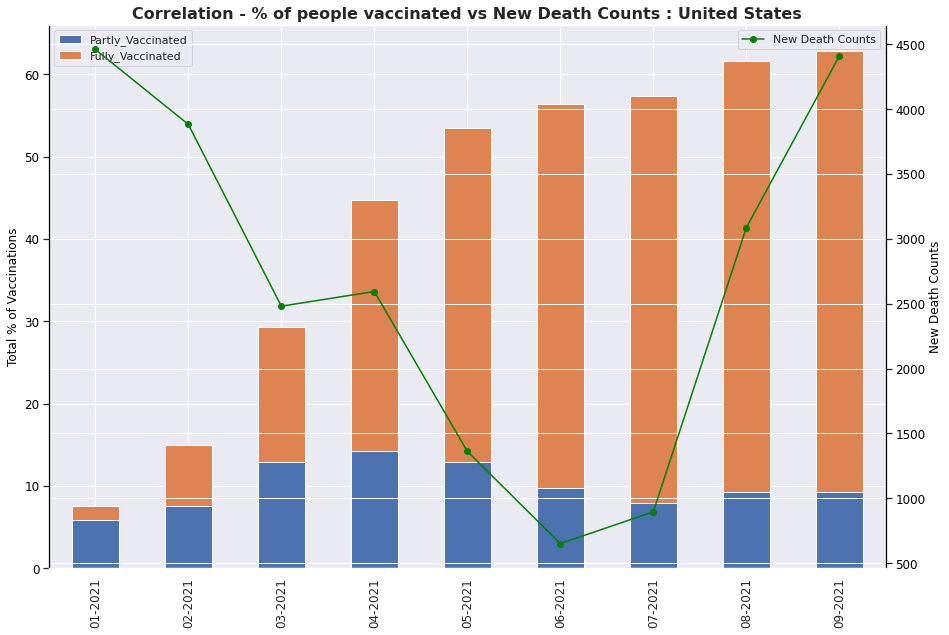

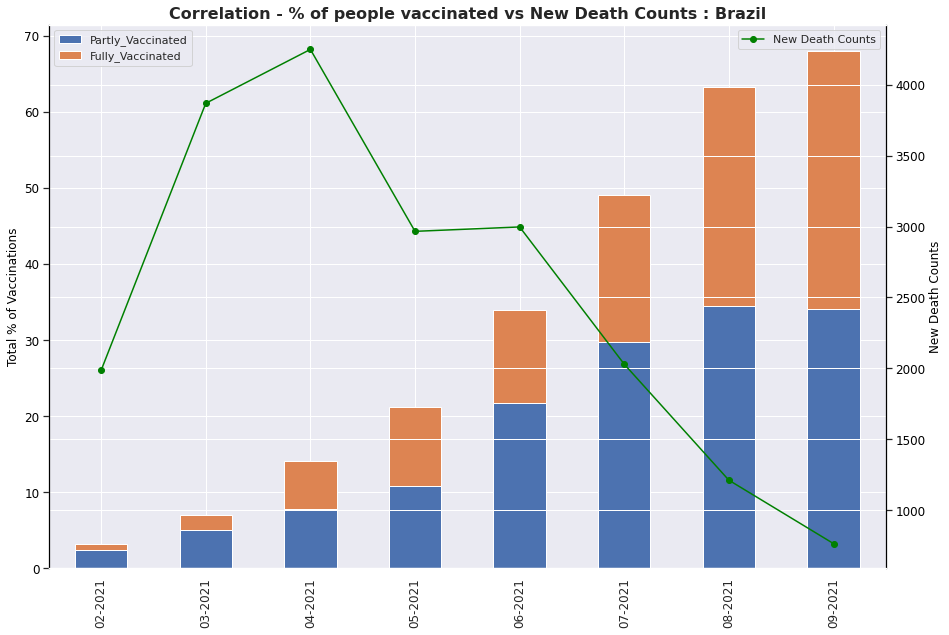

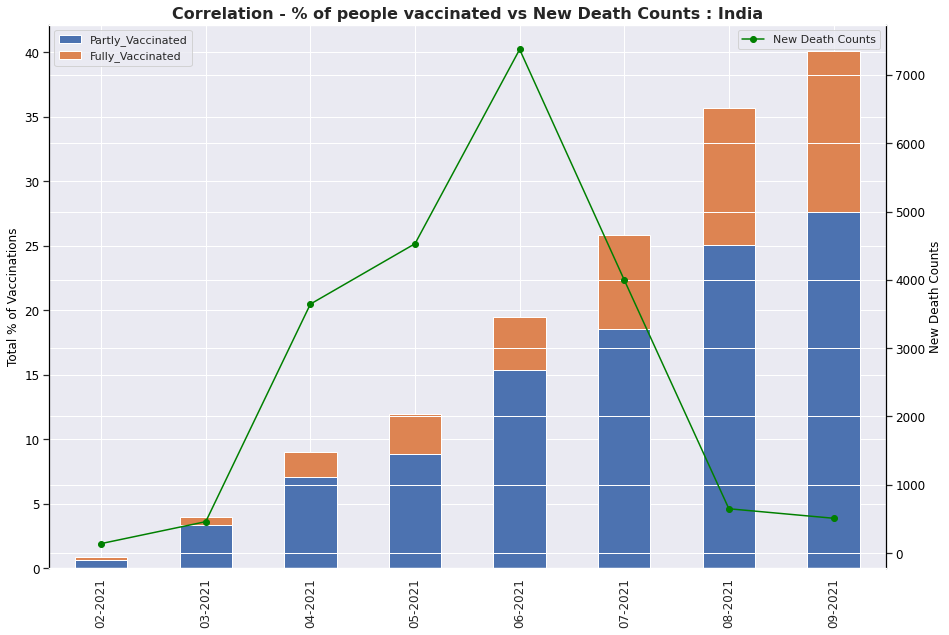

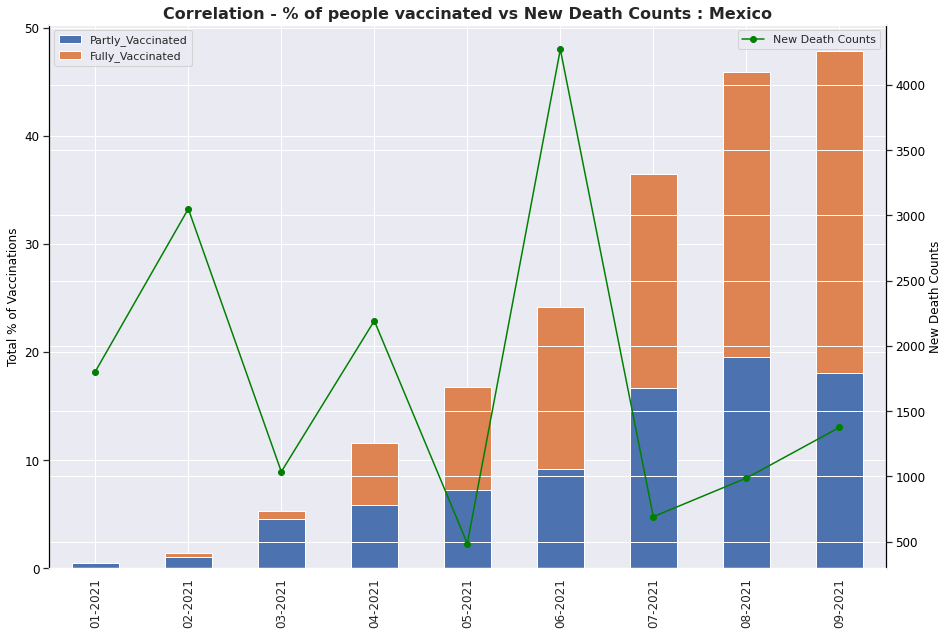

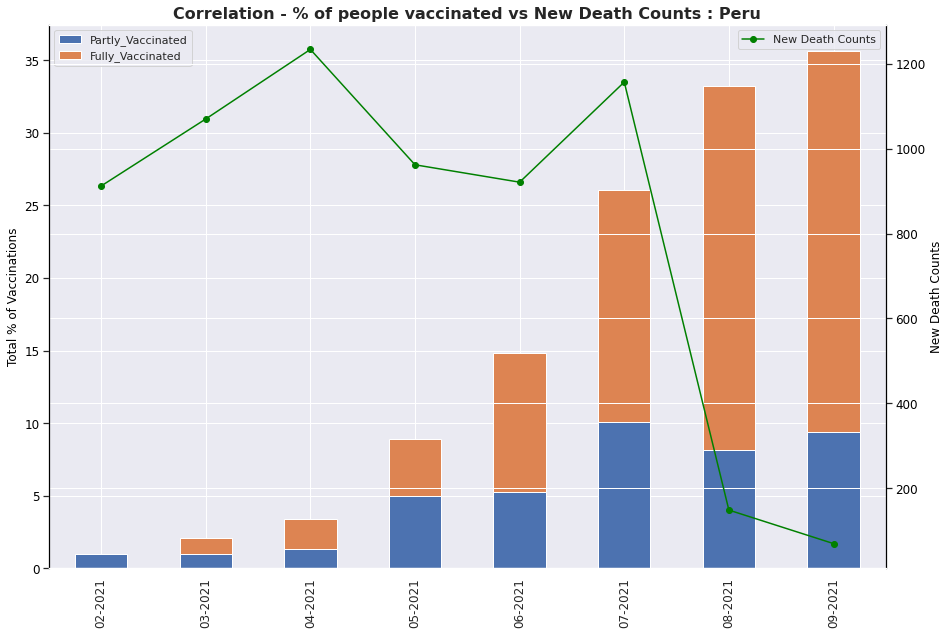

In [7]:
def New_Fun(country,no):
    
    sns.set(rc = {'figure.figsize':(15,10)})
    df = Final_df1[Final_df1['location']==country]
    Years = df['date']
    Fully_Vaccinated = df['Fully_Vaccinated']
    new_deaths = df['new_deaths']
 
    Position = list(range(len(df['date'])))
    
    # set the width
    Width = 0.5
    
    ax1 = df[['Partly_Vaccinated','Fully_Vaccinated']].plot(kind='bar', width = Width , stacked=True) 
    

    color1 = 'black'
    plt.ylabel('Total % of Vaccinations',color=color1, fontsize=12)
    plt.xticks(Position, Years, fontsize=12)
    ax1.tick_params(axis='y', labelcolor=color1, labelsize=12)
    
    color2 = 'black'
    ax2 = plt.twinx()
    line2 = plt.plot(Position, new_deaths, 'o-', color='green',label="New Death Counts")
    plt.ylabel('New Death Counts')
    plt.xticks(Position, Years)
    plt.title(f"Correlation - % of people vaccinated vs New Death Counts : {country}", fontsize=16, fontweight='bold')
#     ax2.plot(x, x_sqrt, color=color2)
    ax2.set_ylabel('New Death Counts', color=color2, fontsize=12)
    ax2.tick_params(axis='y', labelcolor=color2,  labelsize=12)

    ax2.spines['left'].set_color(color1)
    ax2.spines['right'].set_color(color2)
    plt.legend(loc="upper right")

#Top Countries with largest number of death cases
country = ['United States','Brazil', 'India', 'Mexico', 'Peru'] 
for no,con in enumerate(country):
    New_Fun(con,no+1)
